In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))

from models.collaborative_filtering_model import CollaborativeFiltering
from pprint import pprint
from dataset.data_loader import DataLoader, playtime_forever_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer

['/Users/jackson/Desktop/Classes/2024 Spring/ML Projects/ml-projects-project/models', '/Users/jackson/.pyenv/versions/3.11.3/lib/python311.zip', '/Users/jackson/.pyenv/versions/3.11.3/lib/python3.11', '/Users/jackson/.pyenv/versions/3.11.3/lib/python3.11/lib-dynload', '', '/Users/jackson/.pyenv/versions/3.11.3/envs/ml_project_3.11.3/lib/python3.11/site-packages', '/Users/jackson/Desktop/Classes/2024 Spring/ML Projects/ml-projects-project/models/../']


In [ ]:
# data_loader = DataLoader()
data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])
# data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, score_normalizers = [GaussianNormalizer(2.0, 1.0)], game_embeddings = ['name', 'genres'], user_game_edge_embeddings = ['playtime_forever'])
network = data_loader.get_full_network()
train_network, test_network = data_loader.load_random_train_test_network(network=network, train_percentage=0.8, test_percentage=0.2, seed=0)

Total Learnable Parameters: 9706500
Known Game Embeddings:  []
Known User Embeddings:  []


100%|██████████| 100/100 [13:46<00:00,  8.26s/it]


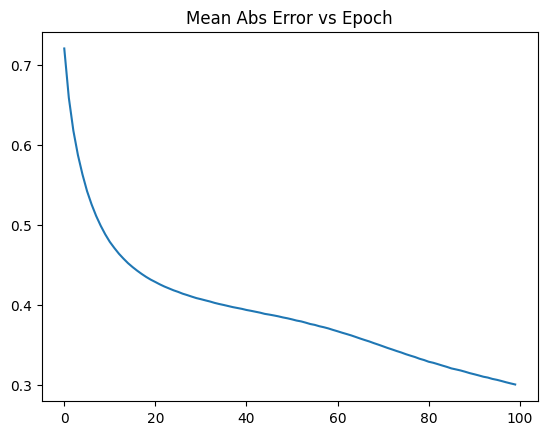

In [ ]:
model = CollaborativeFiltering(num_epochs = 100, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 0.5, regularization = 0.00)
model.set_data_loader(data_loader)
model.train(train_network, debug=True)
model.save('test_collaborative_filtering', overwrite=True)

In [ ]:
pprint(model.score_and_predict_n_games_for_user(76561199583716145)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199583716145)[-10:])
pprint(model.score_and_predict_n_games_for_user(76561199600587957)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199600587957)[-10:])

[(1418630, {'score': 1.8884303833991325}),
 (252490, {'score': 1.8363503796428216}),
 (271590, {'score': 1.405729175762871}),
 (1462040, {'score': 1.196849500592415}),
 (221100, {'score': 1.1564759659838577}),
 (582010, {'score': 1.155639132274188}),
 (250900, {'score': 1.1297066001324882}),
 (1811260, {'score': 1.1105952040976554}),
 (1245620, {'score': 1.0805570386621013}),
 (646570, {'score': 1.0461247695038005})]
[(2162810, {'score': 0.18971300865836613}),
 (677300, {'score': 0.18960016469817564}),
 (2395680, {'score': 0.18933595802848072}),
 (294680, {'score': 0.1890525514497729}),
 (1738520, {'score': 0.1888321845249951}),
 (1667700, {'score': 0.18786857489030953}),
 (314220, {'score': 0.1873541011326665}),
 (1444480, {'score': 0.18301606070346388}),
 (1107300, {'score': 0.18226697413861231}),
 (1294060, {'score': 0.18225591984416317})]
[(1418630, {'score': 2.541533137630719}),
 (252490, {'score': 2.407679956009375}),
 (271590, {'score': 1.7292432103528037}),
 (1462040, {'score':

In [ ]:
# second_common_neighbors_model = CollaborativeFiltering(num_epochs = 20, num_user_embedding = 50, num_game_embedding = 50, learning_rate = 0.01, regularization = 0.05)
# second_common_neighbors_model.set_data_loader(data_loader)
# second_common_neighbors_model.load('test_collaborative_filtering')

KeyError: 'seed    '